<a href="https://colab.research.google.com/github/fareehaikram/CNN-with-keras/blob/main/Config.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

%run '/content/drive/MyDrive/CVAssg3/input_load.ipynb' 
#run load_input.ipynb file for loading the data

Streaming output truncated to the last 5000 lines.
  inflating: seg_pred/seg_pred/street/16635.jpg  
  inflating: seg_pred/seg_pred/street/15648.jpg  
  inflating: seg_pred/seg_pred/street/8704.jpg  
  inflating: seg_pred/seg_pred/street/13694.jpg  
  inflating: seg_pred/seg_pred/street/2206.jpg  
  inflating: seg_pred/seg_pred/street/4649.jpg  
  inflating: seg_pred/seg_pred/street/22297.jpg  
  inflating: seg_pred/seg_pred/street/9732.jpg  
  inflating: seg_pred/seg_pred/street/16177.jpg  
  inflating: seg_pred/seg_pred/street/5807.jpg  
  inflating: seg_pred/seg_pred/street/17271.jpg  
  inflating: seg_pred/seg_pred/street/12443.jpg  
  inflating: seg_pred/seg_pred/street/6211.jpg  
  inflating: seg_pred/seg_pred/street/2696.jpg  
  inflating: seg_pred/seg_pred/street/24255.jpg  
  inflating: seg_pred/seg_pred/street/12264.jpg  
  inflating: seg_pred/seg_pred/street/4615.jpg  
  inflating: seg_pred/seg_pred/street/15023.jpg  
  inflating: seg_pred/seg_pred/street/21877.jpg  
  infla

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0     

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/100
6/6 [==============================] - 4s 561ms/step - loss: 503.1935 - accuracy: 0.1760 - val_loss: 32.6489 - val_accuracy: 0.2292

Epoch 00001: val_accuracy improved from -inf to 0.22917, saving model to vgg16_trained_wts.h5
Epoch 2/100
6/6 [==============================] - 3s 536ms/step - loss: 26.5346 - accuracy: 0.2470 - val_loss: 3.6734 - val_accuracy: 0.3125

Epoch 00002: val_accuracy improved from 0.22917 to 0.31250, saving model to vgg16_trained_wts.h5
Epoch 3/100
6/6 [==============================] - 3s 513ms/step - loss: 3.3087 - accuracy: 0.3248 - val_loss: 1.2530 - val_accuracy: 0.4792

Epoch 00003: val_accuracy improved from 0.31250 to 0.47917, saving model to vgg16_trained_wts.h5
Epoch 4/100
6/6 [==============================] - 6s 489ms/step - loss: 1.3611 - accuracy: 0.4659 - val_loss: 1.1388 - val_accuracy: 0.5417

Epoch 00004: val_accuracy improved from 0.47917 to 0.54167, saving model to vgg16_trained_wts.h5
Epoch 5/100
6/6 [==========================

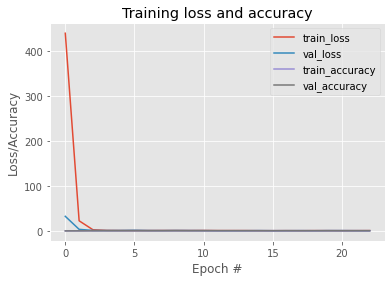

In [8]:
%run '/content/drive/MyDrive/CVAssg3/Train_model.ipynb' 
#run load_input.ipynb file for training the model

In [1]:
%run '/content/drive/MyDrive/CVAssg3/load_testData.ipynb'
#will load X_test,Y_test,saved_model weights

  2%|▏         | 23/1128 [00:00<00:04, 228.62it/s]

loading test images


100%|██████████| 1330/1330 [00:00<00:00, 1559.35it/s]


In [19]:
%run '/content/drive/MyDrive/CVAssg3/helpFunction_test.ipynb'
#use class_rep(X_test,y_test,saved_model,predictions) for classification report
#use test_image(img_path,saved_model) for testing a query image
# use Evaluate_model(X_test,y_test,saved_model) for evaluating the model
# use Confusion_mat(y_test,predictions)
print('running finisdhed')










running finisdhed


In [9]:
#save prediction
predictions = saved_model.predict(X_test, batch_size=32)
print('stop pred')
import pickle as p
p.dump(predictions,open( "save.p", "wb" ))#save 
predictions = p.load( open( "save.p", "rb" ) )#load

In [21]:
Evaluate_model(X_test,y_test,saved_model)

229/229 [==============================] - 17s 71ms/step - loss: 0.3307 - accuracy: 0.8837
Test Loss =  0.33068224787712097
Test Accuracy =  0.8837145566940308


(1, 150, 150, 3)
['forest']


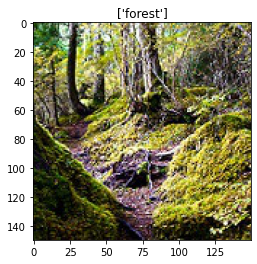

In [20]:
img_path = '/content/seg_pred/seg_pred/forest/10021.jpg'
test_image(img_path,saved_model)

In [22]:
class_rep(X_test,y_test,saved_model,predictions)#generate classification report

              precision    recall  f1-score   support

         sea       0.87      0.92      0.89      1144
      forest       0.96      0.97      0.96      1166
      street       0.88      0.81      0.84      1330
    mountain       0.81      0.84      0.83      1297
   buildings       0.92      0.84      0.88      1128
     glacier       0.89      0.94      0.91      1236

    accuracy                           0.88      7301
   macro avg       0.89      0.89      0.89      7301
weighted avg       0.88      0.88      0.88      7301



[[1049    1    0    0    7   87]
 [  18 1129    1    1    2   15]
 [  10    7 1072  183   32   26]
 [  15   26  110 1088   44   14]
 [  54   11   39   65  952    7]
 [  66    5    1    1    1 1162]]


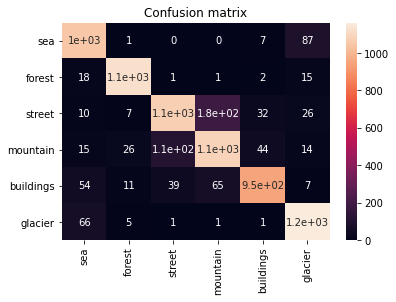

Confusion matrix:
<function confusion_matrix at 0x7f136a60ce18>


In [17]:
Confusion_mat(y_test,predictions)#generate heat map
